# Project_2-_Digit_Recognition_Part_1

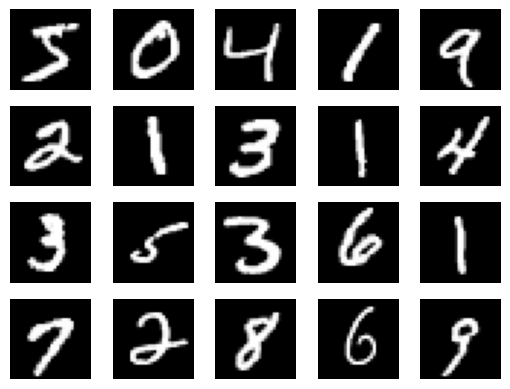

/tmp/ipykernel_7298/4211825742.py:41: RuntimeWarning: invalid value encountered in matmul
  theta = np.linalg.inv(X.T @ X + lambda_factor * I) @ X.T @ Y


Linear Regression test_error = 0.7697


In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from linear_regression import *
from svm import *
from softmax import *
from features import *
from kernel import *

#######################################################################
# 1. Introduction
#######################################################################

# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

#######################################################################
# 2. Linear Regression with Closed Form Solution
import numpy as np

### Functions for you to fill in ###

def closed_form(X, Y, lambda_factor):
    """
    Computes the closed form solution of linear regression with L2 regularization

    Args:
        X - (n, d + 1) NumPy array (n datapoints each with d features plus the bias feature in the first dimension)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        lambda_factor - the regularization constant (scalar)
    Returns:
        theta - (d + 1, ) NumPy array containing the weights of linear regression. Note that theta[0]
        represents the y-axis intercept of the model and therefore X[0] = 1
    """
    I = np.identity(X.shape[1])
    theta = np.linalg.inv(X.T @ X + lambda_factor * I) @ X.T @ Y
    return theta

### Functions which are already complete, for you to use ###

def compute_test_error_linear(test_x, Y, theta):
    test_y_predict = np.round(np.dot(test_x, theta))
    test_y_predict[test_y_predict < 0] = 0
    test_y_predict[test_y_predict > 9] = 9
    return 1 - np.mean(test_y_predict == Y)
#######################################################################

# TODO: first fill out functions in linear_regression.py, otherwise the functions below will not work


def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error


# Don't run this until the relevant functions in linear_regression.py have been fully implemented.
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=1))


In [16]:
import numpy as np
from sklearn.svm import LinearSVC


### Functions for you to fill in ###

def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)
    
    return pred_test_y
def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())

/home/edwin/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM one vs. rest test_error: 0.007499999999999951


In [17]:
def multi_class_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for multiclass classifciation using a one-vs-rest strategy

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (int) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (int) for each test data point
    """
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)
    return pred_test_y

def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

/home/edwin/.local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Multiclass SVM test_error: 0.08189999999999997


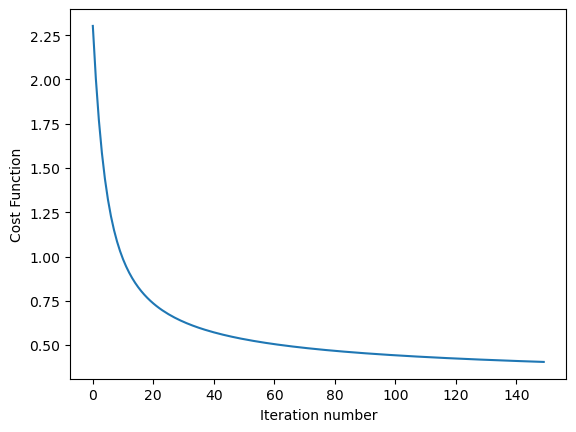

softmax test_error= 0.10050000000000003


In [18]:
def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    write_pickle_data(theta, "./theta.pkl.gz")

    # TODO: add your code here for the "Using the Current Model" question in tab 6.
    #      and print the test_error_mod3
    return test_error


print('softmax test_error=', run_softmax_on_MNIST(temp_parameter=1))  

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def project_onto_PC(X, pcs, n_components, feature_means):
    """
    Given principal component vectors pcs = principal_components(X)
    this function returns a new data array in which each sample in X
    has been projected onto the first n_components principcal components.
    """
    # TODO: first center data using the feature_means
    # TODO: Return the projection of the centered dataset
    #       on the first n_components principal components.
    #       This should be an array with dimensions: n x n_components.
    # Hint: these principal components = first n_components columns
    #       of the eigenvectors returned by principal_components().
    #       Note that each eigenvector is already be a unit-vector,
    #       so the projection may be done using matrix multiplication.
    centered_data = X - feature_means
    return np.dot(centered_data, pcs[:, range(n_components)])



### Functions which are already complete, for you to use ###

def cubic_features(X):
    """
    Returns a new dataset with features given by the mapping
    which corresponds to the cubic kernel.
    """
    n, d = X.shape  # dataset size, input dimension
    X_withones = np.ones((n, d + 1))
    X_withones[:, :-1] = X
    new_d = 0  # dimension of output
    new_d = int((d + 1) * (d + 2) * (d + 3) / 6)

    new_data = np.zeros((n, new_d))
    col_index = 0
    for x_i in range(n):
        X_i = X[x_i]
        X_i = X_i.reshape(1, X_i.size)

        if d > 2:
            comb_2 = np.matmul(np.transpose(X_i), X_i)

            unique_2 = comb_2[np.triu_indices(d, 1)]
            unique_2 = unique_2.reshape(unique_2.size, 1)
            comb_3 = np.matmul(unique_2, X_i)
            keep_m = np.zeros(comb_3.shape)
            index = 0
            for i in range(d - 1):
                keep_m[index + np.arange(d - 1 - i), i] = 0

                tri_keep = np.triu_indices(d - 1 - i, 1)

                correct_0 = tri_keep[0] + index
                correct_1 = tri_keep[1] + i + 1

                keep_m[correct_0, correct_1] = 1
                index += d - 1 - i

            unique_3 = np.sqrt(6) * comb_3[np.nonzero(keep_m)]

            new_data[x_i, np.arange(unique_3.size)] = unique_3
            col_index = unique_3.size

    for i in range(n):
        newdata_colindex = col_index
        for j in range(d + 1):
            new_data[i, newdata_colindex] = X_withones[i, j]**3
            newdata_colindex += 1
            for k in range(j + 1, d + 1):
                new_data[i, newdata_colindex] = X_withones[i, j]**2 * X_withones[i, k] * (3**(0.5))
                newdata_colindex += 1

                new_data[i, newdata_colindex] = X_withones[i, j] * X_withones[i, k]**2 * (3**(0.5))
                newdata_colindex += 1

                if k < d:
                    new_data[i, newdata_colindex] = X_withones[i, j] * X_withones[i, k] * (6**(0.5))
                    newdata_colindex += 1

    return new_data


def center_data(X):
    """
    Returns a centered version of the data, where each feature now has mean = 0

    Args:
        X - n x d NumPy array of n data points, each with d features

    Returns:
        - (n, d) NumPy array X' where for each i = 1, ..., n and j = 1, ..., d:
        X'[i][j] = X[i][j] - means[j]       
	- (d, ) NumPy array with the columns means

    """
    feature_means = X.mean(axis=0)
    return (X - feature_means), feature_means


def principal_components(centered_data):
    """
    Returns the principal component vectors of the data, sorted in decreasing order
    of eigenvalue magnitude. This function first calculates the covariance matrix
    and then finds its eigenvectors.

    Args:
        centered_data - n x d NumPy array of n data points, each with d features

    Returns:
        d x d NumPy array whose columns are the principal component directions sorted
        in descending order by the amount of variation each direction (these are
        equivalent to the d eigenvectors of the covariance matrix sorted in descending
        order of eigenvalues, so the first column corresponds to the eigenvector with
        the largest eigenvalue
    """
    scatter_matrix = np.dot(centered_data.transpose(), centered_data)
    eigen_values, eigen_vectors = np.linalg.eig(scatter_matrix)
    # Re-order eigenvectors by eigenvalue magnitude:
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    return eigen_vectors


###Correction note:  Differing from the release, this function takes an extra input feature_means.

def plot_PC(X, pcs, labels, feature_means):
    """
    Given the principal component vectors as the columns of matrix pcs,
    this function projects each sample in X onto the first two principal components
    and produces a scatterplot where points are marked with the digit depicted in
    the corresponding image.
    labels = a numpy array containing the digits corresponding to each image in X.
    """
    pc_data = project_onto_PC(X, pcs, n_components=2, feature_means=feature_means)
    text_labels = [str(z) for z in labels.tolist()]
    fig, ax = plt.subplots()
    ax.scatter(pc_data[:, 0], pc_data[:, 1], alpha=0, marker=".")
    for i, txt in enumerate(text_labels):
        ax.annotate(txt, (pc_data[i, 0], pc_data[i, 1]))
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    plt.show()


###Correction note:  Differing from the release, this function takes an extra input feature_means.

def reconstruct_PC(x_pca, pcs, n_components, X, feature_means):
    """
    Given the principal component vectors as the columns of matrix pcs,
    this function reconstructs a single image from its principal component
    representation, x_pca.
    X = the original data to which PCA was applied to get pcs.
    """
    x_reconstructed = np.dot(x_pca, pcs[:, range(n_components)].T) + feature_means
    return x_reconstructed


In [20]:
n_components = 18

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from softmax import softmax_regression  # Assuming you have this function available

# Load the MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

# Compute the PCA representations for both training and test data
# Assuming you have `pcs` and `feature_means` computed from the principal_components function
n_components = 18  # Number of principal components to use
train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# Retrain the softmax regression model using the PCA-represented training data
theta, cost_function_history = softmax_regression(train_x_pca, train_y, temp_parameter=1, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)

# Calculate the test error on the test data using the PCA-represented test data
test_error = compute_test_error(test_x_pca, test_y, theta, temp_parameter=1)

print(f"Test Error (18-dimensional PCA features): {test_error}")


Test Error (18-dimensional PCA features): 0.14739999999999998


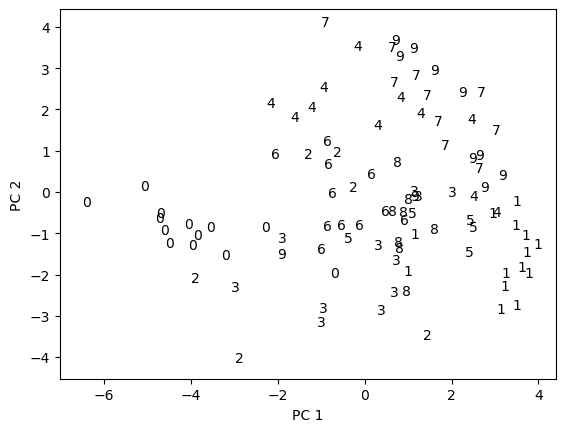

In [21]:
plot_PC(train_x[range(000, 100), ], pcs, train_y[range(000, 100)], feature_means)#feature_means added since release

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from softmax import softmax_regression  # Assuming you have this function available

# Load the MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

# Compute the 10-dimensional PCA representations for training and test data
# Assuming you have `pcs` and `feature_means` computed from the principal_components function
n_components = 10  # Number of principal components to use
train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# Apply cubic feature mapping to the PCA representations
train_x_cubic_pca = cubic_features(train_x_pca)
test_x_cubic_pca = cubic_features(test_x_pca)

# Retrain the softmax regression model using the cubic PCA-represented training data
theta, cost_function_history = softmax_regression(train_x_cubic_pca, train_y, temp_parameter=1, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)

# Calculate the test error on the test data using the cubic PCA-represented test data
test_error = compute_test_error(test_x_cubic_pca, test_y, theta, temp_parameter=1)

print(f"Test Error (10-dimensional cubic PCA features): {test_error}")
print("done")

Test Error (10-dimensional cubic PCA features): 0.08499999999999996
done


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

# Compute the 10-dimensional PCA representations for training and test data
# Assuming you have `pcs` and `feature_means` computed from the principal_components function
n_components = 10  # Number of principal components to use
train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# Create a cubic polynomial SVM model
cubic_poly_svm = SVC(kernel='poly', degree=3, random_state=0)

# Train the cubic polynomial SVM model on the PCA-represented training data
cubic_poly_svm.fit(train_x_pca, train_y)

# Make predictions on the test data
test_predictions = cubic_poly_svm.predict(test_x_pca)

# Calculate the test error using the cubic polynomial SVM model
test_error = 1 - accuracy_score(test_y, test_predictions)

print(f"Test Error (10-dimensional PCA features using Cubic Polynomial SVM): {test_error}")
print('done')

Test Error (10-dimensional PCA features using Cubic Polynomial SVM): 0.07340000000000002
done


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the MNIST data
train_x, train_y, test_x, test_y = get_MNIST_data()

# Compute the 10-dimensional PCA representations for training and test data
# Assuming you have `pcs` and `feature_means` computed from the principal_components function
n_components = 10  # Number of principal components to use
train_x_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_x_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# Create an RBF SVM model
rbf_svm = SVC(kernel='rbf', random_state=0)

# Train the RBF SVM model on the PCA-represented training data
rbf_svm.fit(train_x_pca, train_y)

# Make predictions on the test data
test_predictions = rbf_svm.predict(test_x_pca)

# Calculate the test error using the RBF SVM model
test_error = 1 - accuracy_score(test_y, test_predictions)

print(f"Test Error (10-dimensional PCA features using RBF SVM): {test_error}")
print("done")

Test Error (10-dimensional PCA features using RBF SVM): 0.06359999999999999
done
